# Introducción a las Regresiones

El objetivo de este ejercicio es practicar con distintas regresiones.

## Regresiones lineales
En este ejercicio vamos a ajustar datos utilizando una aproximación lineal. El primer objetivo será descargar los datos con Pandas en un dataframe y a partir de aqui, utilizar Python para llevar a cabo la estimación de los parámetros a y b de la ecuación lineal:

![texto alternativo](https://i.imgur.com/kwZMEEs.png)

Para este ejemplo, vamos a utilizar el dataset de diabetes que proporciona Scikit-Learn así como la implementación del modelo lineal:

In [0]:
from sklearn import datasets, linear_model

# Cargar el dataset
diabetes = datasets.load_diabetes()

In [0]:
# ver el aspecto que tiene:
diabetes


{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/

Importamos Pandas para convertir el dataset en un dataframe y poder explorarlo:

In [0]:
import pandas as pd

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df.loc[:, 'target'] = pd.Series(diabetes.target)

In [0]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


Ahora, vamos a entrenar el algoritmo de regresión lineal para para crear una función que relacione la columna **bmi** con el **target**, para ello, recordar que seguiremos el siguiente proceso:

![texto alternativo](https://i.imgur.com/CoWlbzQ.png)

1. A partir de dataset, crear el conjunto de train y test
2. Definir las métricas por las que vamos a evaluar la calidad del algoritmo entrenado y las predicciones
3. Si el algoritmo tiene parámetros, definirlos
4. Entrenar el algoritmo con los datos de entrenamiento y evaluar la calidad de la predicción
5. Ejecutar el algoritmo entrenado contra el conjunto de test y comparar el performance del algoritmo en test con respecto al obtenido en train
6. Repetir el proceso hasta que las métricas de train y test sean satisfactorias


In [0]:
import numpy as np

# Generar training/testing sets
diabetes_X_train = np.array(df.loc[:300, 'bmi']).reshape(-1,1)
diabetes_X_test = np.array(df.loc[300:, 'bmi']).reshape(-1,1)

# Generar los targets de los training/testing sets
diabetes_y_train = df.loc[:300, 'target']
diabetes_y_test = df.loc[300:, 'target']

In [0]:
# Crear un objeto con la regresión lineal
regr = linear_model.LinearRegression()

# Entrenar con los datos de entrenamiento
regr.fit(diabetes_X_train, diabetes_y_train)

# Hacer predicciones sobre el conjunto de test
diabetes_y_pred = regr.predict(diabetes_X_test)

# Obtener los coeficientes
print('Pendiente: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Pendiente: 
 [981.57861003]
Intercept: 
 151.21461210538808


Definir como métrica el error cuadrático medio:

![texto alternativo](https://i.imgur.com/d6FHO8q.png)

y el [coeficiente de Determinación](https://es.wikipedia.org/wiki/Coeficiente_de_determinaci%C3%B3n). El coeficiente determina la calidad del modelo para replicar los resultados, y la proporción de variación de los resultados que puede explicarse por el modelo.

In [0]:
from sklearn.metrics import mean_squared_error, r2_score

# Calcular el Error cuadrático medio:
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))

# Varianza explicada: 1 es una predicción perfecta:
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Mean squared error: 3744.93
Variance score: 0.34


A continuación, representaremos nuestras predicciones frente a los datos para el conjunto de test:

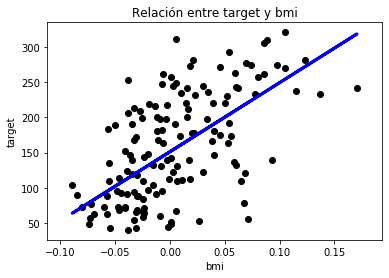

In [0]:
import matplotlib.pyplot as plt

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.ylabel("target")
plt.xlabel("bmi")
plt.title("Relación entre target y bmi")

plt.show()

### ¿Te animas a repetir el mismo ejercicio con otra variable?
Selecciona otra variable distinta y crea tantas celdas en el notebook como te sean necesarias. No dudes en reutilizar el código que acabas de ver.

In [0]:
# incluye tu código aquí

## Regresiones Polinómicas
Ahora vamos a llevar a cabo un ajuste Polinómico. El primer objetivo será descargar los datos con Pandas en un dataframe y a partir de aqui, utilizar Python para llevar a cabo la estimación de los parámetros de la ecuación polinómica (independientemente del grado de la misma):

![texto alternativo](https://i.imgur.com/8HsYoF2.png)

Para este ejemplo, vamos a generar un conjunto de datos al azar y vamos a utilizar el algoritmo de [regresión de Ridge](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression) que se basa en el método de [Regularización de Tíjonov](https://es.wikipedia.org/wiki/Regularizaci%C3%B3n_de_T%C3%ADjonov) para resolver ecuaciones y poder llevar a cabo el entrenamiento.

![texto alternativo](https://i.imgur.com/nRxii0s.png)

Nota, este es un [blog muy interesante](https://towardsdatascience.com/ridge-regression-for-better-usage-2f19b3a202db) para saber más de esta aproximación.

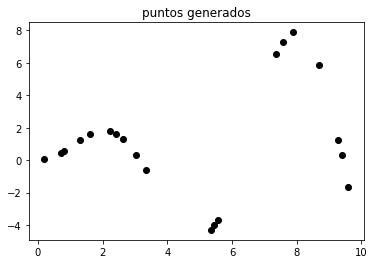

In [0]:
# crear conjunto de datos a aproximar:

def f(x):
    """ funcion a aproximar usando una interpolación polinómica"""
    return x * np.sin(x)


# generar puntos
x = np.linspace(0, 10, 100)
x_plot = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)

# seleccionar unos cuantos para entrenar
x = np.sort(x[:20])
y = f(x)

# representarlos
plt.scatter(x, y,  color='black')
plt.title("puntos generados")
plt.show()

Grado:  3
   Coeficientes:  [-2.12422983  0.55146887 -0.03454482]
   Intercept:  2.1342463702989334
Grado:  4
   Coeficientes:  [ 3.15461801 -2.85656685  0.59630896 -0.03493989]
   Intercept:  1.2105604450326743
Grado:  1
   Coeficientes:  [0.25640633]
   Intercept:  -0.023782950393456348


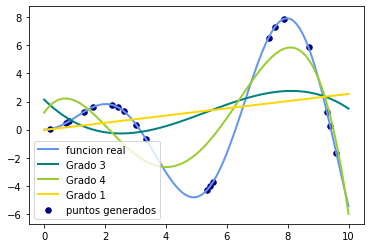

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# crear matrices a partir de los vecotres de puntos generados
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

# representar los puntos
colors = ['teal', 'yellowgreen', 'gold']
lw = 2

# representar la curva real a partir de f
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="funcion real")
plt.scatter(x, y, color='navy', s=30, marker='o', label="puntos generados")

# representar ajustes para distintos grados:
for count, degree in enumerate([3, 4, 1]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    # print results:
    print('Grado: ', degree)
    print('   Coeficientes: ', model.steps[1][1].coef_[1:])
    print('   Intercept: ', model.steps[1][1].intercept_)

    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="Grado %d" % degree)

plt.legend(loc='lower left')

plt.show()

Animate y edita el código para probar como se ajustan curvas con distintos grados. 

A partir de las distintas curvas que se generan, podrías ponerlas en google para ver su comportamiento?

![texto alternativo](https://i.imgur.com/F8smHw0.png)

Por último, crea otra función f() diferente a la creada en el ejercicio que acabamos de ver y prueba de nuevo este método para encontrar la función que mejor se aproxima a esta nueva función.

In [0]:
# incluye tu código aquí


## K-Nearest Neighbors
En este ejemplo, vamos a entender como funciona este algoritmo y como podemos hacer predicciones. 

Como se ha comentado, este algoritmo utiliza la información de sus vecinos para estimar los valores del punto de interes. Para ello, principalmente se necesita determinar las distancias entre vecinos y el número de vecinos a tener en cuenta.

Paramos de este ejemplo:

![texto alternativo](https://i.imgur.com/FXzkkqV.png)

Imaginemos que queremos saber el peso para  ``ID = 11``. Para ello, utilizaremos la información de sus vecinos:

![texto alternativo](https://i.imgur.com/ig1EzpI.png)

De acuerdo con esta imagen, Probablemente diriamos que dado que ID11 está más cerca de los puntos ID5 y ID1, debe tener un peso similar a estos ID, probablemente entre 72-77 kg (pesos de ID1 e ID5 de la tabla). Eso realmente tiene sentido, pero vemos como lo hace el algoritmo:

El primer paso, sería definir las distancias entre vecinos:
![texto alternativo](https://i.imgur.com/37uC88x.png)

Para ello, se puede seleccionar cualquiera de los 3 tipos de métodos disponibles:


1.   **Distancia euclidiana**: la distancia euclidiana se calcula como la raíz cuadrada de la suma de las diferencias cuadráticas entre un nuevo punto (x) y un punto existente (y).
2.   **Distancia de Manhattan**: Esta es la distancia entre vectores reales usando la suma de su diferencia absoluta.
![texto alternativo](https://i.imgur.com/ErAhI7Z.png)
3. **Distancia de Hamming**: se utiliza para variables categóricas. Si el valor (x) y el valor (y) son iguales, la distancia D será igual a 0. De lo contrario, D = 1.
![texto alternativo](https://i.imgur.com/DkVdLMp.png)

A modo ilustrativo, estas son distintas formas de definir distancias:
![texto alternativo](https://i.imgur.com/Wnpjz4U.png)

Lo siguiente, será definir el número de vecinos a tener en cuenta para la estimación del parámetro, por ejemplo, si selecionamos 3 vecinos:
![texto alternativo](https://i.imgur.com/6L52IOV.png)

con lo cual, podemos estimar el peso de ID11 a partir de la info:
![texto alternativo](https://i.imgur.com/iN0Djik.png)

```
ID11 = (77+72+60)/3 
ID11 = 69.66 kg
```

Sin embargo, si definimos 5 vecinos a tener en cuenta para la estimación del parámetro:
![texto alternativo](https://i.imgur.com/qzH2Dtg.png)

con lo cual, podemos estimar el peso de ID11 a partir de la info:
![texto alternativo](https://i.imgur.com/EFtLgw6.png)

```
ID 11 =  (77+59+72+60+58)/5 
ID 11 = 65.2 kg
```

Como podemos ver, obtenemos distintas estimaciones (siempre dentro de un intervalo), podemos entrenar nuestro algoritmo de manera que habiendo definido una métrica para evaluar nuestro algoritmo, somos capaces de minimizar el error cometido en el conjunto de datos de test.







Ahora, vamos a ver un ejemplo utilizando el dataset del precio de las casas de [California](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html):


In [0]:
# carga el dataset de California en un Dataframe de Pandas:
from sklearn.datasets.california_housing import fetch_california_housing

cal_housing = fetch_california_housing()

df = pd.DataFrame(data=cal_housing.data, columns=cal_housing.feature_names)
df.loc[:, 'target'] = pd.Series(cal_housing.target)

In [0]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [0]:
df.shape

(20640, 9)

Vamos a entrenar un algoritmo a partir de las variables: ```['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']```

In [0]:
from sklearn import neighbors

# Generar training/testing sets
cal_X_train = np.array(df.loc[:15000, ['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']])
cal_X_test = np.array(df.loc[15000:, ['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']])

# Generar los targets de los training/testing sets
cal_y_train = df.loc[:15000, 'target']
cal_y_test = df.loc[15000:, 'target']

# inicializar un algoritmo con 3 vecinos
knn = neighbors.KNeighborsRegressor(n_neighbors=3)

# Entrenar con los datos de entrenamiento
knn.fit(cal_X_train, cal_y_train)

# Hacer predicciones sobre el conjunto de test
cal_y_pred = knn.predict(cal_X_test)

# Calcular el Error cuadrático medio:
print("Mean squared error: %.2f"
      % mean_squared_error(cal_y_test, cal_y_pred))

Mean squared error: 1.83


Vamos ahora a realizar un pequeño ejercicio para ver cual es el parámetro óptimo de número de vecinos que tenemos que usar. Para ello, vamos a ejecutar nuestro algoritmo para distintos valores de n_neighbors y ver para que valores minimizamos el error en función de la métrica que hemos definido. 

Nota: intenta crear una función para automatizar este proceso:


In [0]:
def ejecutar_knn(n_neighbors, cal_X_train, cal_y_train, cal_X_test, cal_y_test):
  # inicializar un algoritmo con 3 vecinos
  knn = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors)

  # Entrenar con los datos de entrenamiento
  knn.fit(cal_X_train, cal_y_train)

  # Hacer predicciones sobre el conjunto de test
  cal_y_pred = knn.predict(cal_X_test)

  # Calcular el Error cuadrático medio:
  error = mean_squared_error(cal_y_test, cal_y_pred)
  return error, n_neighbors

error = []
num_neighbors = []
for n_neighbors in range(2,5000):
  if n_neighbors < 100 or n_neighbors%1000==0:
    res = ejecutar_knn(n_neighbors, cal_X_train, cal_y_train, cal_X_test, cal_y_test)
    error.append(res[0])
    num_neighbors.append(res[1])


Text(0.5, 0, 'numbero de vecinos')

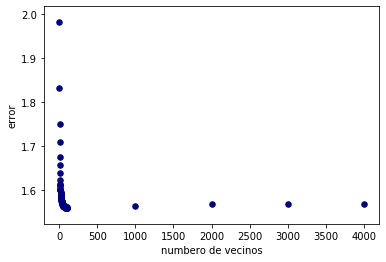

In [0]:
plt.scatter(num_neighbors, error, color='navy', s=30, marker='o', label="puntos generados")
plt.ylabel('error')
plt.xlabel('numbero de vecinos')

## Decision Tree Regressor
Ahora, sobre el mismo dataset vamos a llevar a cabo el mismo ajuste, pero esta vez, usando un arbol de decisión para regresión:

In [0]:
from sklearn import tree

# inicializar el arbol de decision
clf = tree.DecisionTreeRegressor(max_depth=3)

# Entrenar con los datos de entrenamiento
clf.fit(cal_X_train, cal_y_train)

# Hacer predicciones sobre el conjunto de test
cal_y_pred = clf.predict(cal_X_test)

# Calcular el Error cuadrático medio:
print("Mean squared error: %.2f"
      % mean_squared_error(cal_y_test, cal_y_pred))

Mean squared error: 1.16


Lo bueno de los arboles de decisión es que permiten entender cuales son las variables más importantes:

[Text(167.4, 190.26, 'X[1] <= 6.381\nmse = 1.251\nsamples = 15001\nvalue = 1.986'),
 Text(83.7, 135.9, 'X[4] <= 2.446\nmse = 0.941\nsamples = 12420\nvalue = 1.807'),
 Text(41.85, 81.53999999999999, 'X[0] <= 21.5\nmse = 1.539\nsamples = 3396\nvalue = 2.337'),
 Text(20.925, 27.180000000000007, 'mse = 0.973\nsamples = 1031\nvalue = 1.885'),
 Text(62.775000000000006, 27.180000000000007, 'mse = 1.658\nsamples = 2365\nvalue = 2.535'),
 Text(125.55000000000001, 81.53999999999999, 'X[4] <= 3.131\nmse = 0.571\nsamples = 9024\nvalue = 1.607'),
 Text(104.625, 27.180000000000007, 'mse = 0.733\nsamples = 4710\nvalue = 1.781'),
 Text(146.475, 27.180000000000007, 'mse = 0.324\nsamples = 4314\nvalue = 1.417'),
 Text(251.10000000000002, 135.9, 'X[2] <= 1.218\nmse = 1.842\nsamples = 2581\nvalue = 2.849'),
 Text(209.25, 81.53999999999999, 'X[1] <= 7.58\nmse = 1.539\nsamples = 2016\nvalue = 3.156'),
 Text(188.32500000000002, 27.180000000000007, 'mse = 1.376\nsamples = 1542\nvalue = 2.89'),
 Text(230.175, 

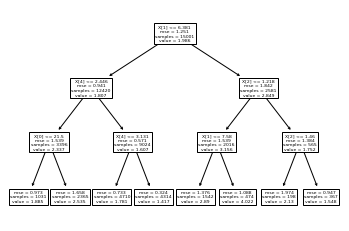

In [0]:
tree.plot_tree(clf) 

A continuación, podemos ver las variables más importantes:

In [0]:
[(x,y) for x,y in zip(clf.feature_importances_, ['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup'])]

[(0.05401803502903255, 'HouseAge'),
 (0.4956546011521489, 'AveRooms'),
 (0.162643707451697, 'AveBedrms'),
 (0.0, 'Population'),
 (0.28768365636712157, 'AveOccup')]

In [0]:
Podemos representar estas variables para comprobar estas relaciones:

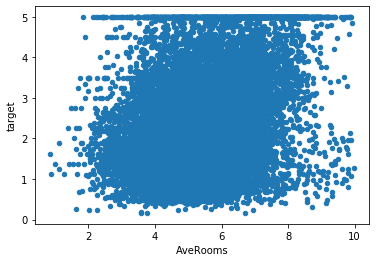

In [0]:
df.loc[df['AveRooms']<10,:].plot.scatter(x='AveRooms', y='target');

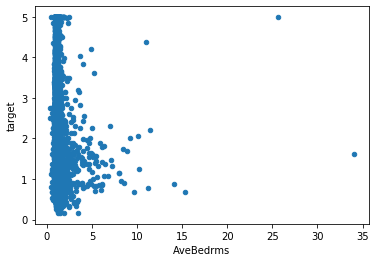

In [0]:
df.plot.scatter(x='AveBedrms', y='target');

In [0]:
df.loc[:, ['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'target']].corr().tail(1)

,HouseAge,AveRooms,AveBedrms,Population,AveOccup,target
target,0.105623,0.151948,-0.046701,-0.02465,-0.023737,1.0


## Random Forest Regressor
Por último, vamos a ejecutar un algoritmo de ensemble del tipo random forest.

In [0]:
from sklearn.ensemble import RandomForestRegressor

# inicializar del algoritmo
clf = RandomForestRegressor(n_estimators=10)

# Entrenar con los datos de entrenamiento
clf.fit(cal_X_train, cal_y_train)

# Hacer predicciones sobre el conjunto de test
cal_y_pred = clf.predict(cal_X_test)

# Calcular el Error cuadrático medio:
print("Mean squared error: %.2f"
      % mean_squared_error(cal_y_test, cal_y_pred))

Mean squared error: 1.07


De todos los algoritmos que hemos probado, ¿cual es el más potente?

Al igual que los árboles de decisión, también proporciona la importancia de las variables:


In [0]:
[(x,y) for x,y in zip(clf.feature_importances_, ['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup'])]

[(0.12602892484286235, 'HouseAge'),
 (0.31250849730381913, 'AveRooms'),
 (0.1978854865412454, 'AveBedrms'),
 (0.11651748981253747, 'Population'),
 (0.2470596014995357, 'AveOccup')]

¿Se parecen las importancias de las variables a las obtenidas anteriormente con el arbol de decisión?

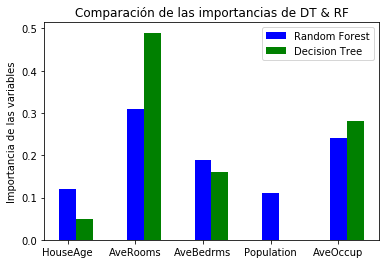

In [0]:
# edit data para representar las differencias entre ambas aproximaciones
data = [[0.12, 0.31, 0.19, 0.11, 0.24], [0.05, 0.49, 0.16, 0.0, 0.28]] # data contiene las importancias de las variables

X = np.arange(5)
plt.bar(X + 0.00, data[0], color = 'b', width = 0.25, label='Random Forest')
plt.bar(X + 0.25, data[1], color = 'g', width = 0.25, label='Decision Tree')
plt.xticks(X, ['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup'])
plt.legend(loc='best')
plt.ylabel('Importancia de las variables')
plt.title('Comparación de las importancias de DT & RF')

plt.show()

# ¿Quieres probar tú?

Descarga este [dataset](https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+#) y prueba lo que has aprendido!

El objetivo será predecir este valor para ver si el sistema eléctrico es estable o inestable:
![texto alternativo](https://i.imgur.com/QrXETrT.png
)

In [0]:
# incluye aquí tu código
